# Проект по теме "Машинное обучение для бизнеса"

# Описание проекта

**Заказчик: добывающей компании «ГлавРосГосНефть»** 

*Требуется выбрать локации для скважины*

**Вводные данные:**

Есть данные о пробах нефти в трёх регионах (по 10 000 месторождений): качество нефти и объём её запасов. 

**Цели и задачи:**

1. Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль.

2. Необходимо проанализировать возможную прибыль и риски техникой *Bootstrap.*

**Шаги для выбора локации:**

- Ищем месторождения в избранном регионе, для каждого определяем значения признаков;
- Строим модель и оцениваем объём запасов;
- Выбираем месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Описание данных**

- Данные геологоразведки трёх регионов находятся в файлах: geo_data_0.csv; geo_data_1.csv; geo_data_2.csv.
- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).

**Условия задачи:**

* Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
* Бюджет на разработку скважин в регионе — 10 млрд рублей.
* При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей (1000 бар.)
* Не рассматривать регионы, в которых вероятность убытков меньше 2.5%. Выбирают регион с наибольшей средней прибылью.

**План достижения цели:**

1. Загрузка и подготовка данных;
2. Обучение и проверка модели;
3. Подготовка к расчету финансовых показателей;
4. Расчет прибыли и рисков;
5. Общий вывод.

## Загрузка и подготовка данных

**Подгружаем библиотеки для работы**

* pandas -  для обработки и анализа данных в таблицах
* numpy - для мат. вычислений
* seaborn - для визуализации данных
* matplotlib - для визуализации данных

In [1]:
# загрузка модулей и библиотек

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy.random import RandomState
from scipy import stats as st

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import warnings
warnings.filterwarnings(action='ignore')



**Загрузим данные и выведем по 10 строк с каждого датафрейма и изучим основную информацию**

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
def data_read_file(file_path):
    
    try:
        data = pd.read_csv(file_path)
    except:
        data = pd.read_csv(file_path)
    
    display(data.head(10))
    display(data.info())
    
    print('Количество дубликатов:', sum(data.duplicated()))

    return data

In [4]:
geo0 = data_read_file('geo_data_0.csv')


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Количество дубликатов: 0


In [5]:
geo1 = data_read_file('geo_data_1.csv')


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Количество дубликатов: 0


In [6]:
geo2 = data_read_file('geo_data_2.csv')


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Количество дубликатов: 0


In [7]:
print('Количество уникальный скважин в 0 регионе:', len(geo0['id'].unique()))
print('Количество уникальный скважин вo 1 регионе:', len(geo1['id'].unique()))
print('Количество уникальный скважин во 2 регионе:', len(geo2['id'].unique()))

Количество уникальный скважин в 0 регионе: 99990
Количество уникальный скважин вo 1 регионе: 99996
Количество уникальный скважин во 2 регионе: 99996


* Пропусков в данных нет
* Типы данных соответствуют наполнению
* Практически все данные уникальны, всего 0,006% дубликатов в столбце id, не считаю, что это серьезная проблема

**Построим гистограммы**

In [8]:
# функция для построения графика распределения и ящика с усами

def show_hist(data, data_label, num_bins, rug=False):
    sns.set()

    f, axes = plt.subplots(1, 2, figsize=(16,4))
    axes[0].set_title(data_label + ". Плотность распределения", fontsize=18)
    axes[0].set_ylabel('плотность', fontsize=15)
    sns.distplot(data, bins=num_bins, rug=rug, ax=axes[0])
    
    axes[1].set_title(data_label + ". Boxplot", fontsize=18)
    sns.boxplot(data=data, ax=axes[1])
    plt.show()


In [9]:
def show_region(data, name):
    numerics = ['f0', 'f1', 'f2', 'product']
    for column in numerics:
        show_hist(data[column], name + ' ' + column, num_bins=20)

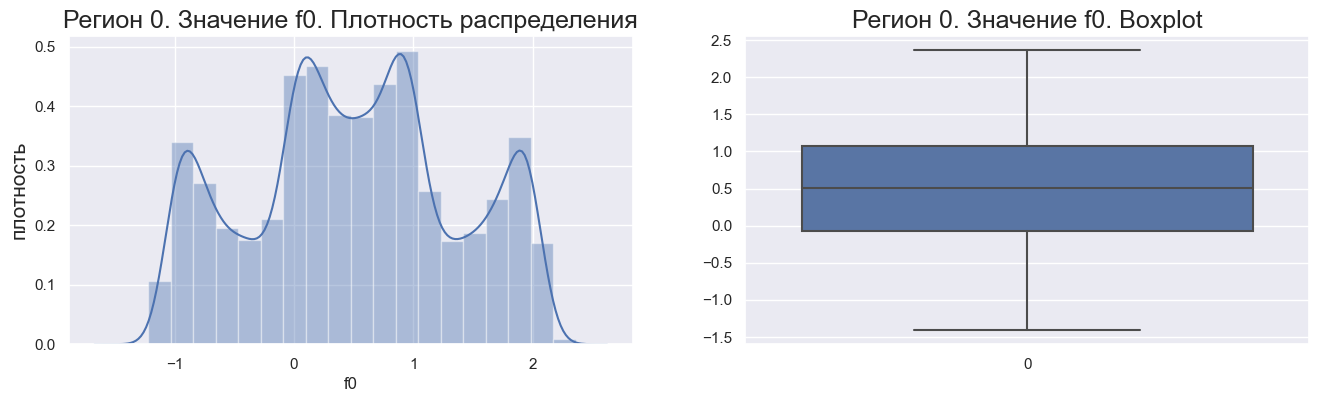

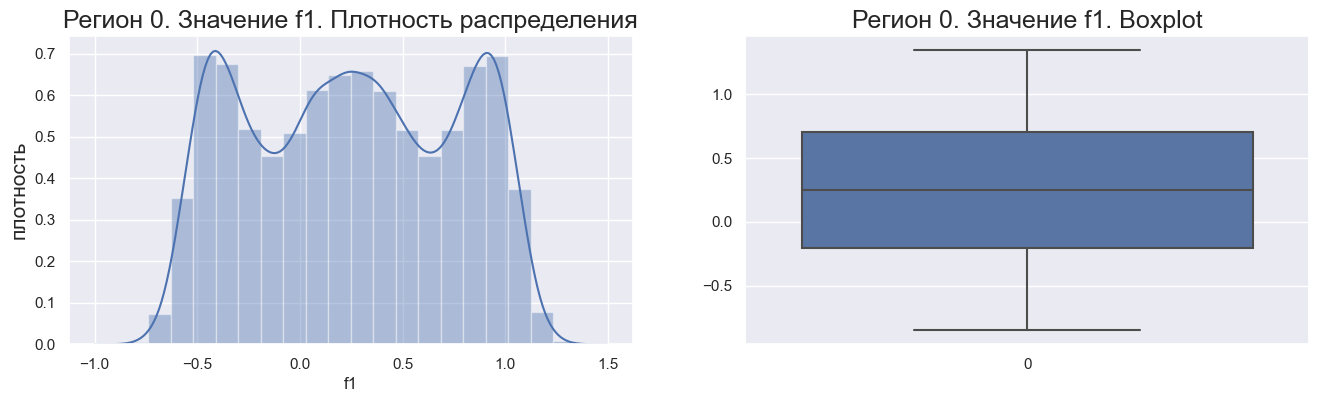

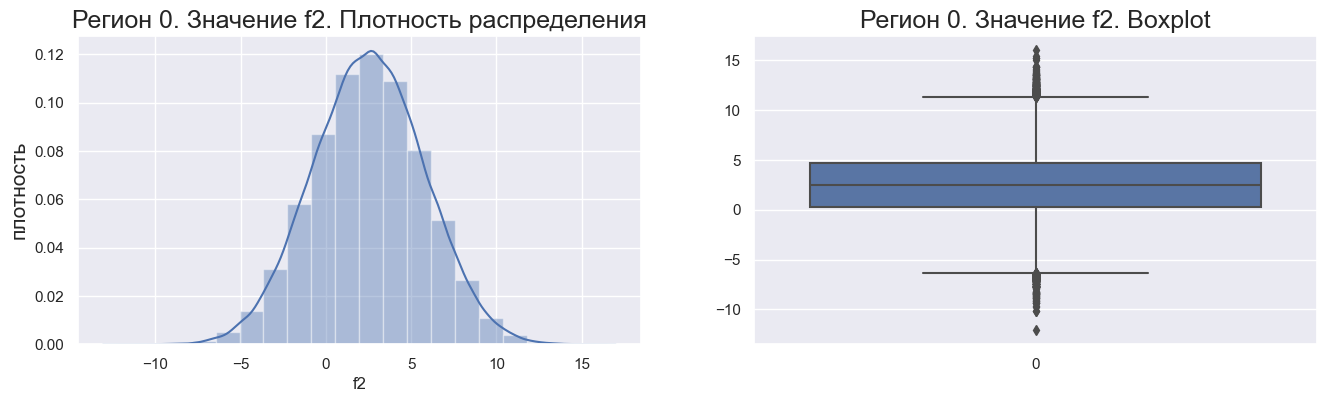

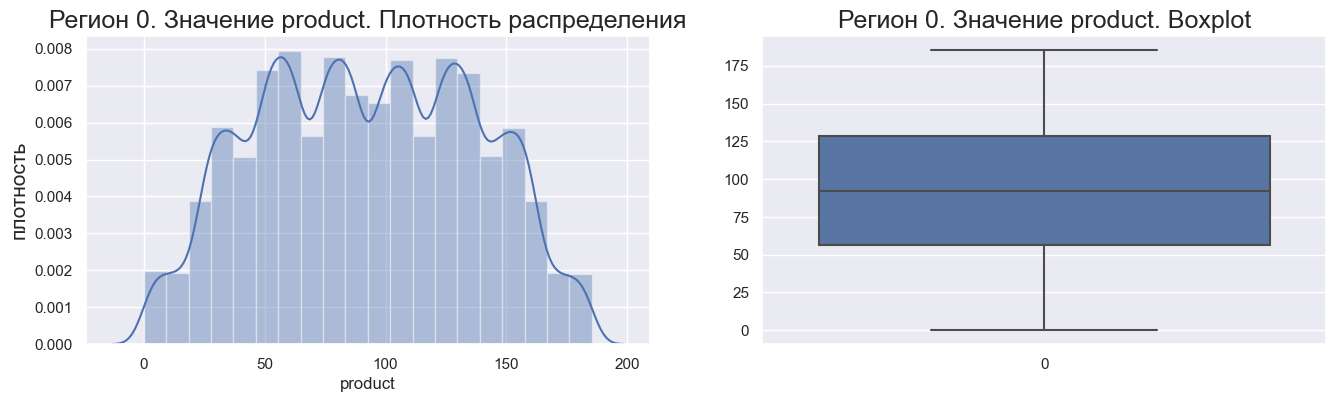

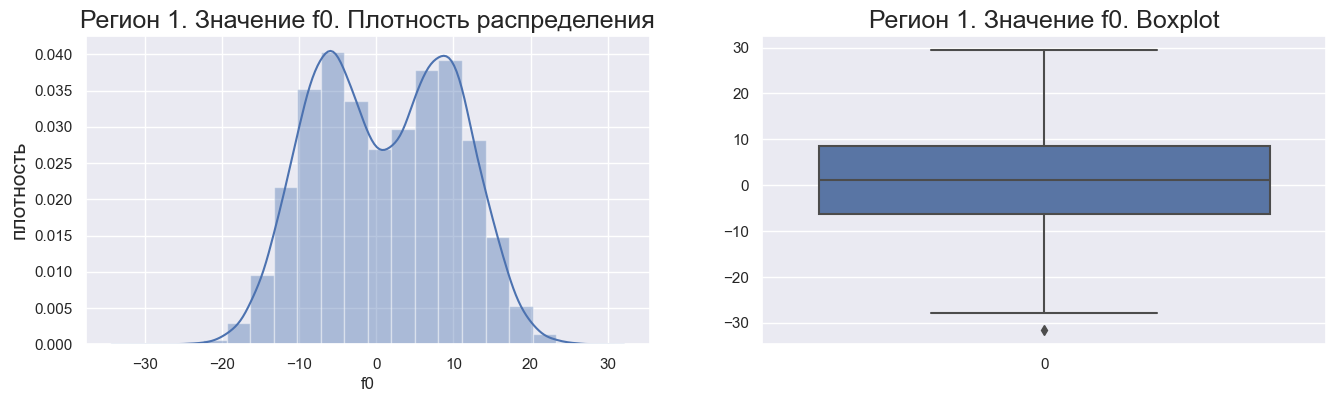

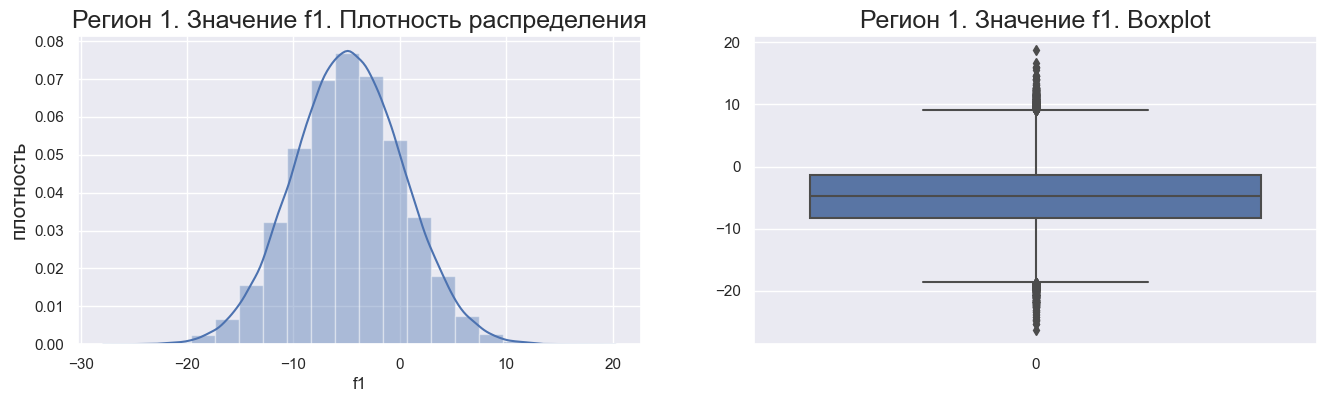

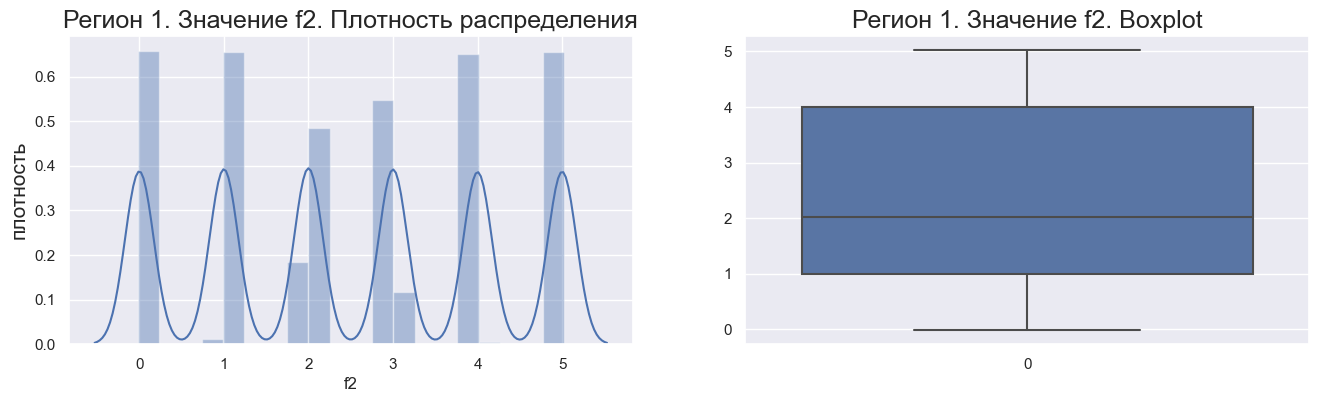

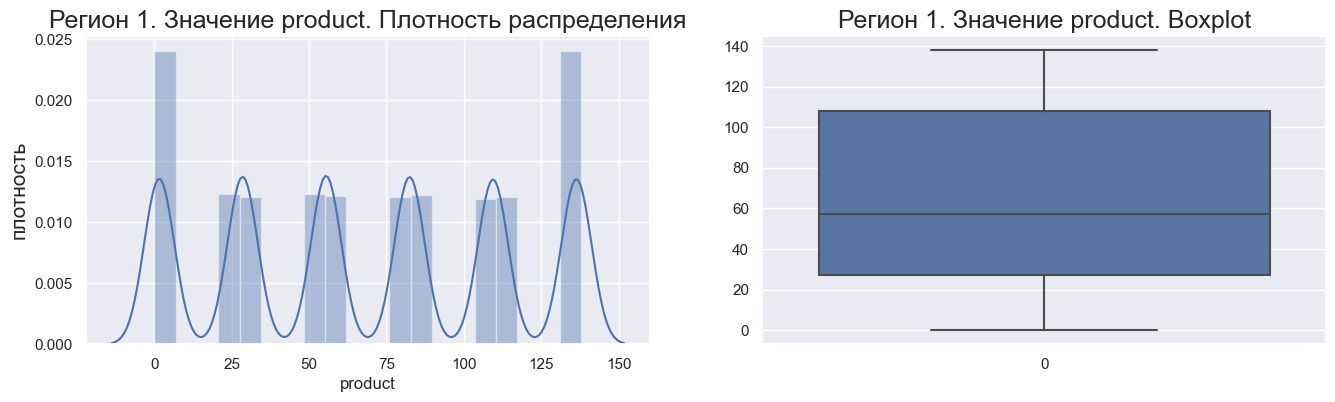

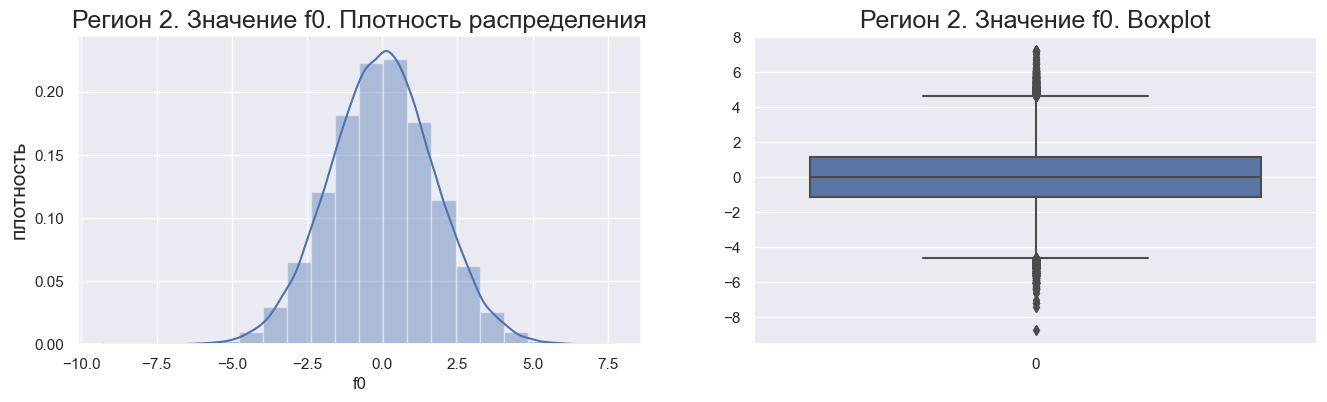

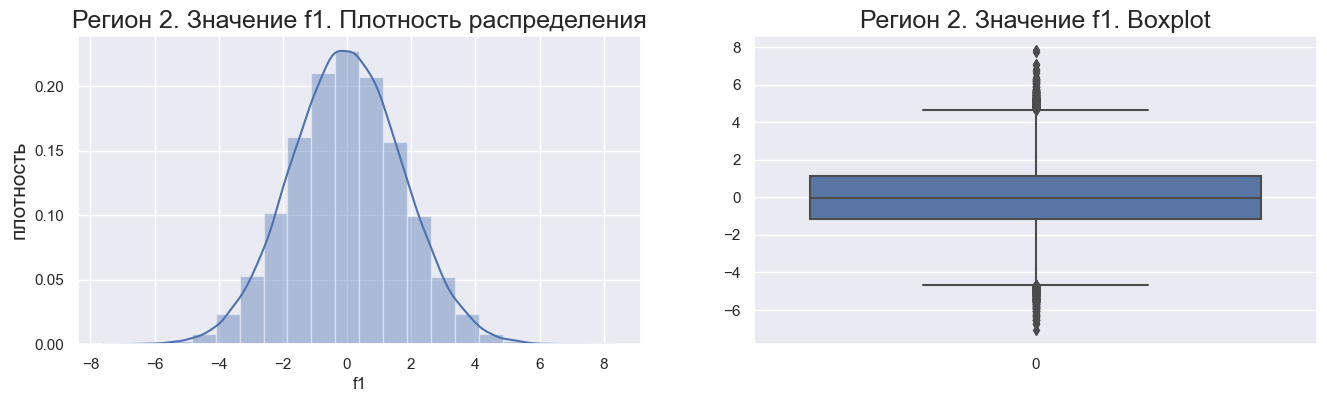

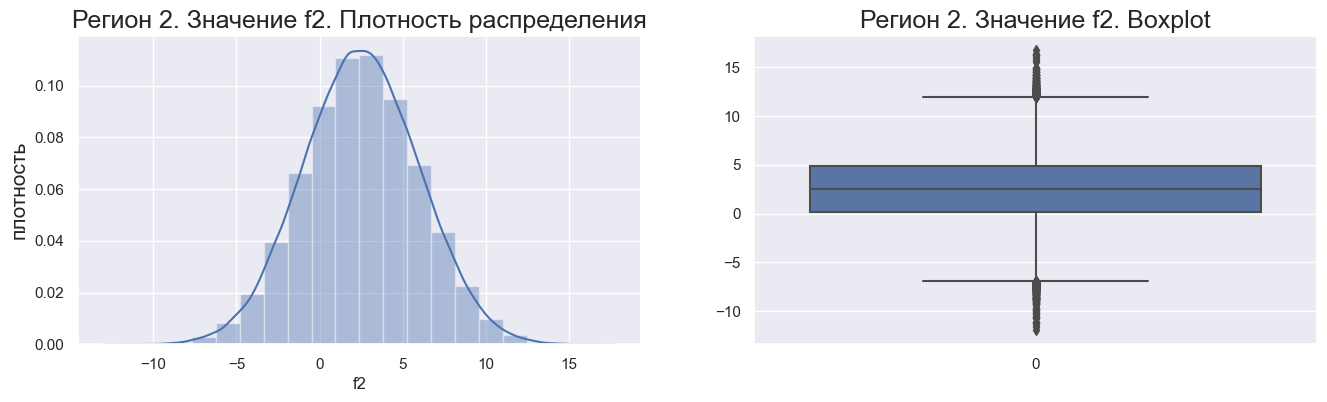

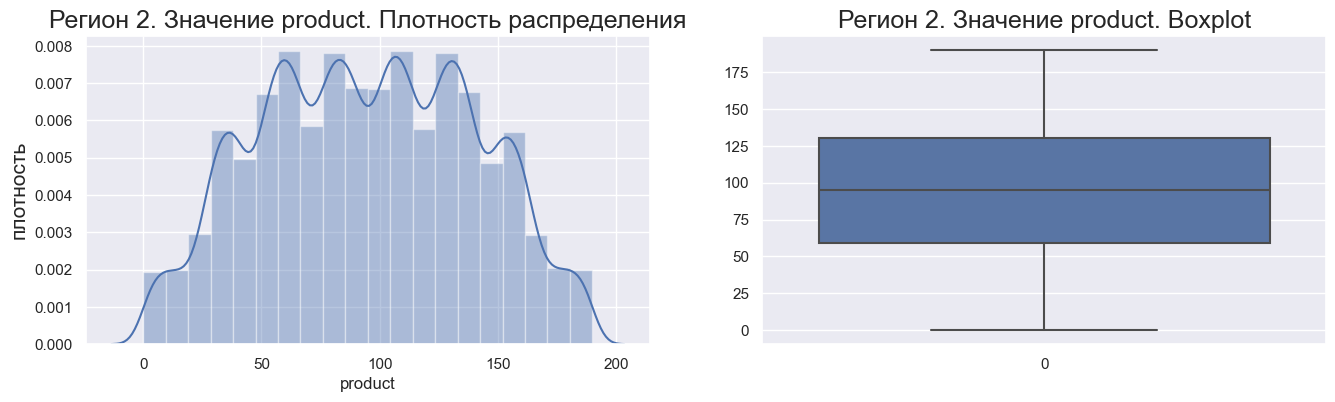

In [10]:
for data, name in [(geo0, 'Регион 0. Значение'), (geo1, 'Регион 1. Значение'), (geo2, 'Регион 2. Значение')]:
    show_region(data, name)

**Промежуточные выводы по графикам:**
1. Не все значение распределены нормально;
2. Регион 0 и 2 имеют очень похожие распределения параметров product и f2;
3. Регион 1 имеет распределение показателя product с пропусками, неравномерное;
4. Масштабирование признаков не требуется

**Разделим данные на признаки и целевое значение**

In [11]:
features = ['f0', 'f1', 'f2']
target = ['product']

X_0 = geo0[features]
y_0 = geo0[target]

X_1 = geo1[features]
y_1 = geo1[target]

X_2 = geo2[features]
y_2 = geo2[target]

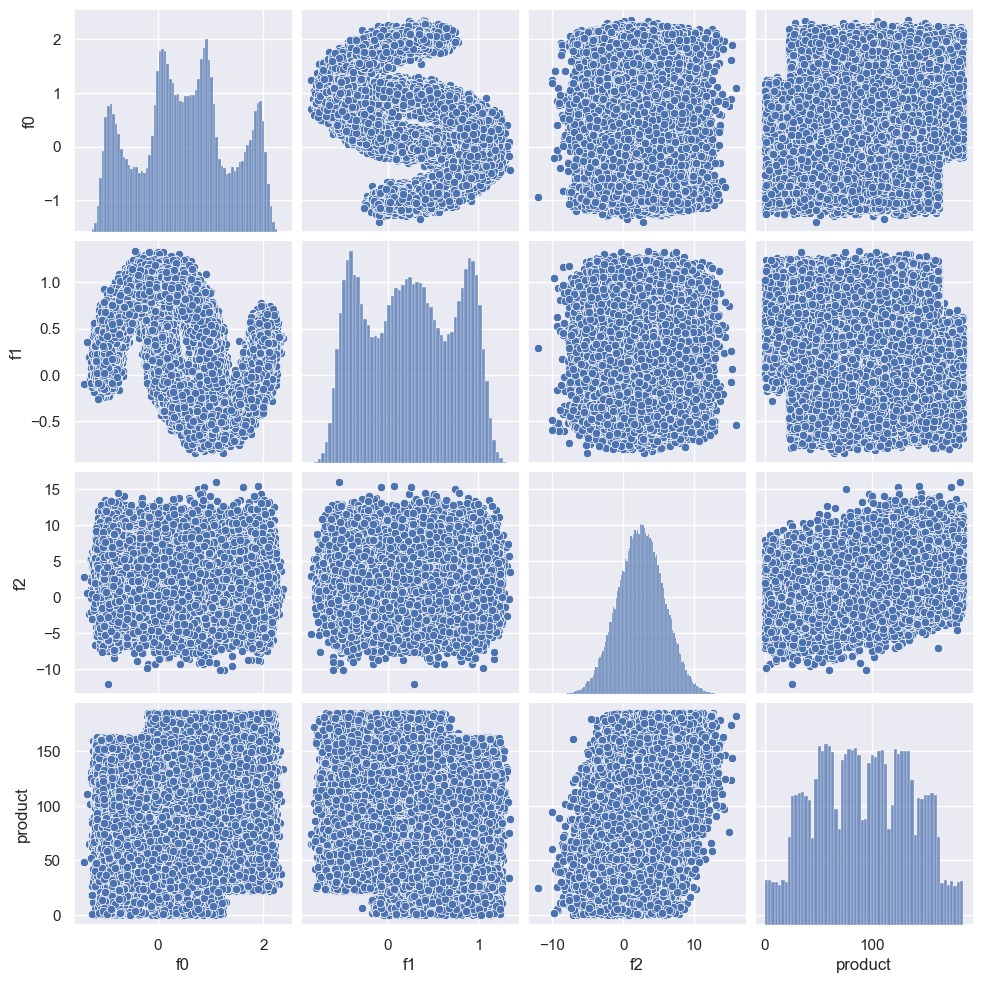

In [12]:
sns.pairplot(geo0);

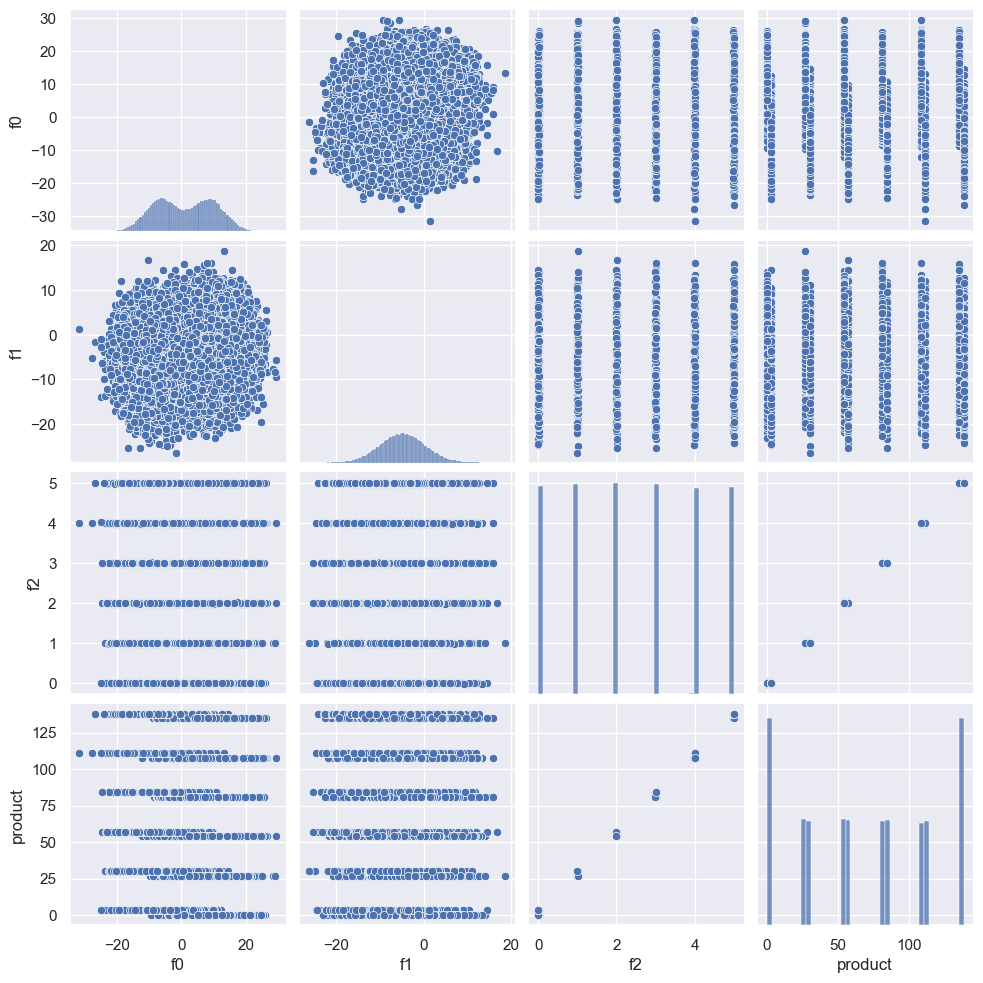

In [13]:
sns.pairplot(geo1);

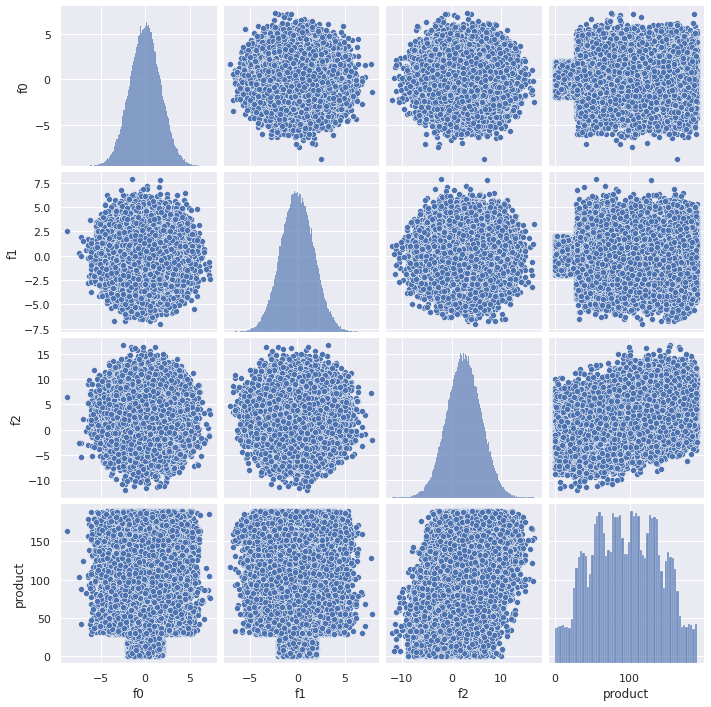

In [14]:
sns.pairplot(geo2);

**Выводы**

- Библиотеки и модули для работы подключены; 
- Первычный анализ данных выполнен: дубликатов нет, пропусков нет, типы данных соответствуют действительности;
- Визуализация данных дала представление о датафреймах: есть небольшие выбросы, данные не все распределены нормально, масштабирование не требуется. 
- Признаки друг от друга в целом не зависят за исключением линейной связи f2 - product в регионе 1

Так как нет представления о том, что означают характеристики f0, f1, f2 - не стоит делать каких-либо манипуляций.

## Обучение и проверка модели


Обучите и проверьте модель для каждого региона:
 - 2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
 - 2.2. Обучите модель и сделайте предсказания на валидационной выборке.
 - 2.3. Сохраните предсказания и правильные ответы на валидационной выборке.
 - 2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
 - 2.5. Проанализируйте результаты.

Напишем функцию:
1. Разделим выборки на тренировочную и валидационную
2. Обучим модель линейной регрессии
3. Выведем rmse модели

In [15]:
def model_fit(x, y):
    
    X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=42)
    
    print('Размер тренировочной выборки:', X_train.shape)
    print('Размер валидационной выборки:', X_valid.shape)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    predict = model.predict(X_valid)
    
    predicted_mean = predict.mean()
    rmse = mean_squared_error(y_valid, predict)**0.5
    
    print('Средний запас сырья, согласно предсказаниям: {:.2f}'.format(predicted_mean))
    print('RMSE модели: {:.2f}'.format(rmse))
    
    return y_valid, predict
    

**Модель Региона 0**

In [16]:
y_0_valid, predict_0 = model_fit(X_0, y_0)

Размер тренировочной выборки: (75000, 3)
Размер валидационной выборки: (25000, 3)
Средний запас сырья, согласно предсказаниям: 92.40
RMSE модели: 37.76


**Модель Региона 1**

In [17]:
y_1_valid, predict_1 = model_fit(X_1, y_1)

Размер тренировочной выборки: (75000, 3)
Размер валидационной выборки: (25000, 3)
Средний запас сырья, согласно предсказаниям: 68.71
RMSE модели: 0.89


**Модель Региона 2**

In [18]:
y_2_valid, predict_2 = model_fit(X_2, y_2)

Размер тренировочной выборки: (75000, 3)
Размер валидационной выборки: (25000, 3)
Средний запас сырья, согласно предсказаниям: 94.77
RMSE модели: 40.15


**Выводы**

1. В регионе 0 и 2 высокий показатель среднего запаса сырья - 92,6 и 95 соответственно, однако корень из средней квадратичной ошибки для моделей предсказания высокий. 
2. В регионе 1 показатель среднего запаса сырья ниже на 35-35% и составляет 68.73, однако корень из средней квадратичной ошибки намного меньше - 0.89, что свидетельствует об относительной точности модели регрессии

## Подготовка к расчёту прибыли

In [19]:
# обозначаем константы для расчетов

BUDGET = 10e9
BOOTSTRAP_SAMPLES = 1000
WELLS_NUMS = 500
WELLS_PICK = 200
UNIT_INCOME = 4.5*10**5

In [20]:
# расчитаем достаточный объём сырья для безубыточной разработки новой скважины.

min_volume = BUDGET/(WELLS_PICK * UNIT_INCOME)

print('Минимальный объем сырье для безубыточного производства составляет: {:.2f}'.format(min_volume))

Минимальный объем сырье для безубыточного производства составляет: 111.11


**Выводы**

1. Минимальный объем сырье для безубыточного производства при выборе 200 лучших скважин из 500 составляет: 111.11
2. 111.11 превышает средний объем запасов скажин по всем регионам

Тот факт, что средние ни по одному из регионов не дотягивают до точки безубыточности говорит нам о том, что мы не можем рандомно выбирать скважины для разработки, ведь в таком случае, нас, возможно, ждет неудача. Соответственно нужно выбирать самы жирные скважины, а для этого нужны модели

## Расчёт прибыли и рисков 


###### Прибыль

Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
 - 4.1. Выберите скважины с максимальными значениями предсказаний: выберем 500 скважин и из них 200 с максимальными показателями запасов. 
 - 4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
 - 4.3. Рассчитайте прибыль для полученного объёма сырья.

In [21]:
y_0_valid = pd.Series(y_0_valid['product']).reset_index(drop=True)
y_1_valid = pd.Series(y_1_valid['product']).reset_index(drop=True)
y_2_valid = pd.Series(y_2_valid['product']).reset_index(drop=True)


In [22]:
predict_0 = pd.Series(*predict_0.reshape(1,-1))
predict_1 = pd.Series(*predict_1.reshape(1,-1))
predict_2 = pd.Series(*predict_2.reshape(1,-1))

In [23]:
def show_predicted_income(wells_mean, wells_sum, wells_revenue):
    
    print("Средний запас сырья в топ 200 лучших скважин в выбранном регионе:{:.2f}".format(wells_mean))
    print("Общий запас сырья в топ 200 лучших скважин в выбранном регионе:{:.2f}".format(wells_sum))
    print("Прибыль с региона:{:.2f}".format(wells_revenue))

In [24]:
# напишем функцию для расчета прибыли

state = 42
def predict_revenue(target, predictions, state, replace=False, show_res=True, return_res=False):
        
# сделаем выборку из предсказаний
    predictions_sample = predictions.sample(n=WELLS_NUMS,
                                           replace=replace,
                                           random_state=state)

# отсортируем выборку по количеству ресурсов и выберем 200 луших скважин
    top_predictions_sorted = predictions_sample.sort_values(ascending=False)[:WELLS_PICK]
    top_targets = target[top_predictions_sorted.index]

# найдем средний запас ресурсов  
    wells_mean = top_targets.mean()

# найдем общий запас ресурсов   
    wells_sum = sum(top_targets)
    
# посчитаем прибыль
    wells_revenue = wells_sum * UNIT_INCOME - BUDGET

     
    if show_res:
        show_predicted_income(wells_mean, wells_sum, wells_revenue)
    if return_res:
        return wells_revenue    

**Регион 0**

In [25]:
predict_revenue(y_0_valid, predict_0, state)

Средний запас сырья в топ 200 лучших скважин в выбранном регионе:113.15
Общий запас сырья в топ 200 лучших скважин в выбранном регионе:22629.14
Прибыль с региона:183112236.31


**Регион 1**

In [26]:
predict_revenue(y_1_valid, predict_1, state)

Средний запас сырья в топ 200 лучших скважин в выбранном регионе:115.96
Общий запас сырья в топ 200 лучших скважин в выбранном регионе:23191.83
Прибыль с региона:436323404.69


**Регион 2**

In [27]:
predict_revenue(y_2_valid, predict_2, state)

Средний запас сырья в топ 200 лучших скважин в выбранном регионе:116.33
Общий запас сырья в топ 200 лучших скважин в выбранном регионе:23265.40
Прибыль с региона:469431517.00


 ###### Риски
 
 - 5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
 - 5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
 - 5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

In [40]:
def show_risk(values_mean, conf_left, conf_right, risk):

    print('Средняя прибыль {:.2f} (млн. Р)'.format(values_mean / 10**6))
    print('95% доверительный интервал: {:.2f} : {:.2f} (млн. Р)'.format(conf_left / 10**6, conf_right / 10**6))
    print('Риск убытков:  {:.2f} %'.format(risk * 100))

In [41]:
def risk_analysis(target, predictions):
    
    state = np.random.RandomState(42)
    bootstrap_samples = 1000
    values = []
    alpha=0.05
    
    for i in range(bootstrap_samples):
        income = predict_revenue(target, predictions, state, replace=True, show_res=False, return_res=True)
        values.append(income)
    
    values = pd.Series(values)
    values_mean = values.mean()

# посчитаем интервалы    
    
    conf_left = values.quantile(alpha/2)
    conf_right = values.quantile(1-alpha/2)
    
# Сделаем счетчик для убытков    
    
    risk = (values < 0).mean()
    
    
    show_risk(values_mean, conf_left, conf_right, risk)



**Регион 0**

In [42]:
risk_analysis(y_0_valid, predict_0)

Средняя прибыль 399.58 (млн. Р)
95% доверительный интервал: -110.47 : 897.46 (млн. Р)
Риск убытков:  6.00 %


**Регион 1**

In [45]:
risk_analysis(y_1_valid, predict_1)

Средняя прибыль 452.05 (млн. Р)
95% доверительный интервал: 61.68 : 845.34 (млн. Р)
Риск убытков:  1.50 %


**Регион 2**

In [46]:
risk_analysis(y_2_valid, predict_2)

Средняя прибыль 375.01 (млн. Р)
95% доверительный интервал: -144.77 : 888.39 (млн. Р)
Риск убытков:  8.00 %


## Выводы

Для топ 200 лучших скважин из 500:

- Средний запас сырья с одной скважины среди всех регионов - 113.15, 115.96, 116.33 для 0, 1 и 2 регионов соответственно;
- Везде оценка средних запасов превосходит минимально необходимый объём 111; 

При применении техники bootstrap (1000 выборок):

- Оценка средней прибыли максимальна для региона 1 - 452 млн.
- Только 1 регион прогнозирую прибыльную разработку согласно 95% доверительному интервалу;
- 0 и 2 регион прогнозирует убытки с рисками 6% и 8% соответственно
- Риск убытков для региона 1 = 1.5%

**Рекомендуемый регион для разработки = 1, лучшее сооношение прибыли к риску**